# Introduction


A client is looking to open an Pizza Place (PP) in Toronto and he/she doesn't know where to open it although a neighborhood with no PP among their top venues is aimed.  Thus, by using the foursquare api we will explore the top5 most common venues in each neighborhood to see which neighborhood lacks from an PP. To increase the chances of succeed in the business the target neighborhood should have closer neighborhood where an PP is in the most common venues.

# Data

The data to be employed will be the list of the neighborhood of Toronto. A group per 150 venues whitin a radius of 800 m from the coordinates of the neighborhood will be extraced from each neighbourhood. Afterwards we will filter the top venues by restaurant, to focus only on food places. Since there will be a high number of neighborhoods, a cluster technique will be consider to reduce the dataset of top venues and decide the place to site our Pizza Place.

We will use the foursquare api to get the venues of the neighborhoods and its category to filter them by restaurant.

The needed data at the begining will be:

address: 'Toronto, Canada'
latitude: 43.651070
longitude:-79.347015

radius:  800 (in meters) .

Foursquare API variables
CLIENT_ID = 'client_id' Foursquare ID
CLIENT_SECRET = 'client_secret' Foursquare Secret key
VERSION = '20180605' Foursquare API version
LIMIT = 150  Limit of number of venues returned by Foursquare API

From all the above data we'll then be able to collect a whole bunch of information by using the following URL and requesting Foursquare's information based on our query.

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
  CLIENT_ID, 
  CLIENT_SECRET, 
  VERSION, 
  latitude, 
  longitude, 
  radius, 
  LIMIT)

# Methodology

### a. Prepraring the dataframe with Toronto's neighborhoods and its coordinates
To import the data about Toronto's neighborhood along with their coordinates, the following links are used: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
http://cocl.us/Geospatial_data

For importing the tables we use pandas package in both cases and the following methods:
--code
```python
pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
pd.read_csv('http://cocl.us/Geospatial_data')
```

Those rows that contains the value 'Not assigned' in Borough's column are removed and values of 'not assigned' in Neighborhood's column are replaced by the Borough values.

Before merging the latitude and longitude of each neighborhood, the data frame is grouped by Postcode and Borough, by using:
```python
def f(x):
     return Series(dict(Neighbourhood = "%s" % ', '.join(x['Neighborhood'])))
df=df.groupby(['Postcode','Borough']).apply(f)
```
The resulting dataframe is obtained by using 
```python
pd.merge(df,df_latlon, on='Postcode')
```
### Finding top venues as restaurants in Toronto
#### 1. Download and Explore Dataset

To have a graphic idea of the distribution of neighbourhoods, we use folium package where Toronto's map is shown and neighbourhoods are marked with blue circles.

#### 2. Explore Neighborhoods
We will use Foursquare API to get venues of each neighborhoods with radius param of 800 (meters) and limit=150.

#### 3. Filtering only Restaurant and food places venues
We are only interested in restaurants and food places. Thus, we explore the values of 'Venue Category' column and create a new dataframe with only restaurants and food places as venues

### Neighborhoods analysis
#### 4. Analizing each Neighborhood
The 5 top venues for each neighborhood are get from the Toronto's restaurants dataframe

#### 5. Cluster Neighborhoods
We will create 5 clusters by using the k-means algorithms. Next, to be able to depict the cluster distribution on a Toront map we will create a new data frame by merging the lat long coordinates of a neighborhood, the 5 top restaurant venues of it and the cluster where it belongs. Then, by using folium maps in the similar way as before the 5 cluster are depicted with colour distinction.

#### 6. Examine Clusters and decide on which neighborhood install our pizza place
Finally we will filter the different neighborhoods in each cluster to see which one lacks of a Pizza place. Those neighborhoods selected will be our candidates.

# Results

After merging the dataframe with neighborhoods, that has been cleaned and preprocessed, along with the dataframe with the neighborhoods, the resulting dataframe is shown as following:
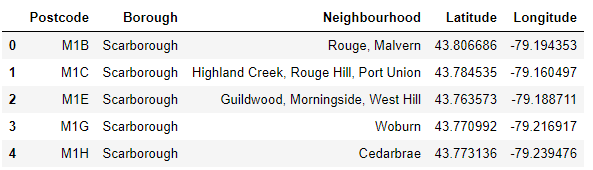

The graphical distribution of neighborhoods in Toronto map is the following:
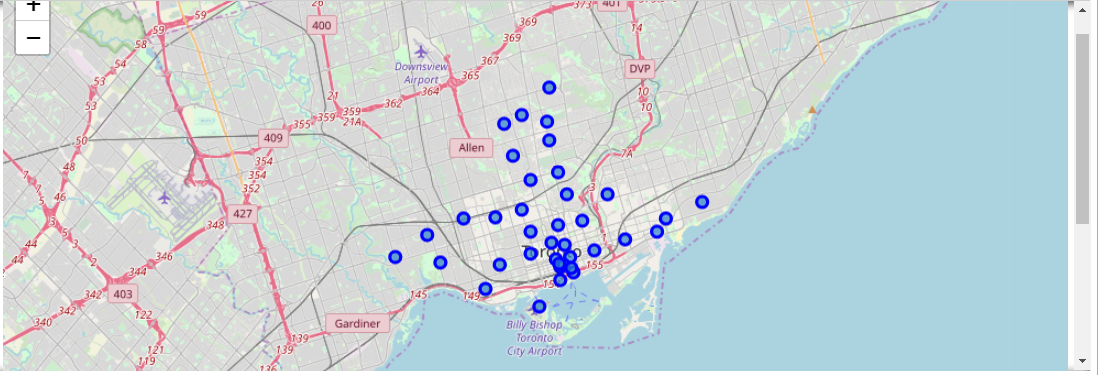

The number of venues found in Toronto by using the API of Foursquare with the param selected are **3988** venues. After selecting restaurants and food places, the venues number is filtered up to **1345** where there are 69 uniques categories. As sample , the data set with the restaurants venues:
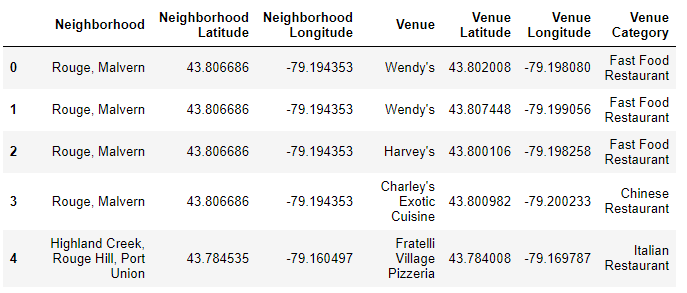


The head of the dataframe of the top venues for each neighborhood is printed:
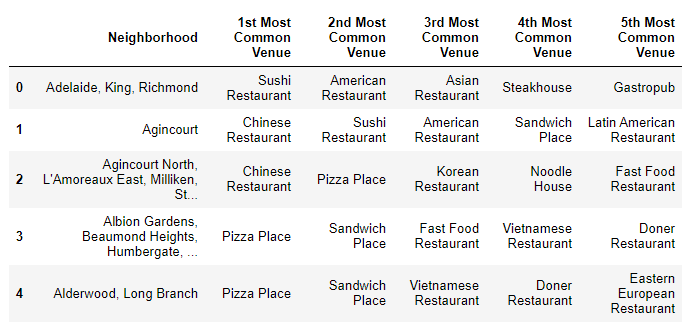

The new dataframe that shows neighborhood, its coordinates, the 5 top restaurant venues and the cluster to it belongs is the following:
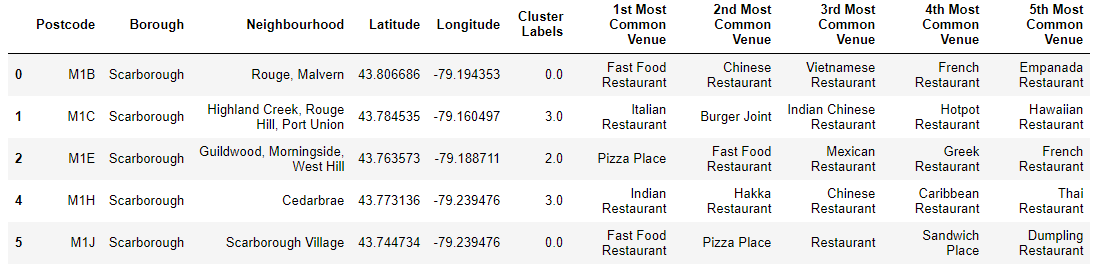

The toronto map that showns the distribution of neighborhood's clusters is depicted below:
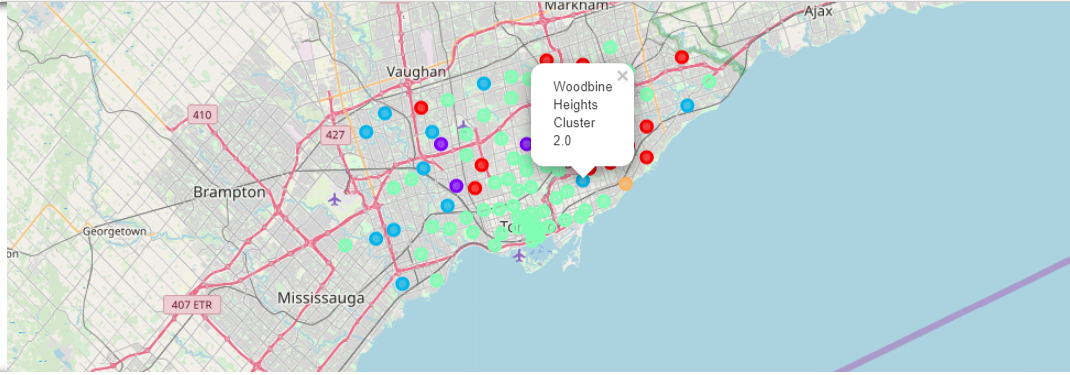

As example of a cluster's the cluster with label 0 is the following:
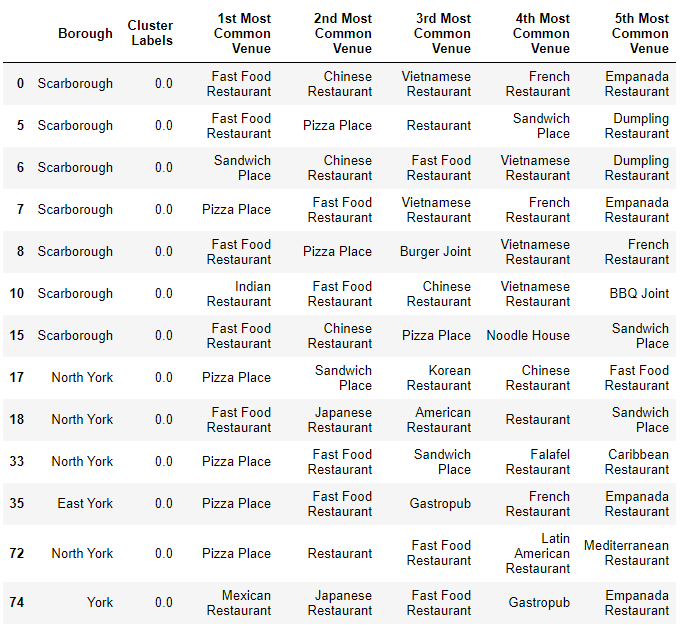

The neighbourhood candidates to install our Pizza place are:

*Cluster 0*: 
5 options
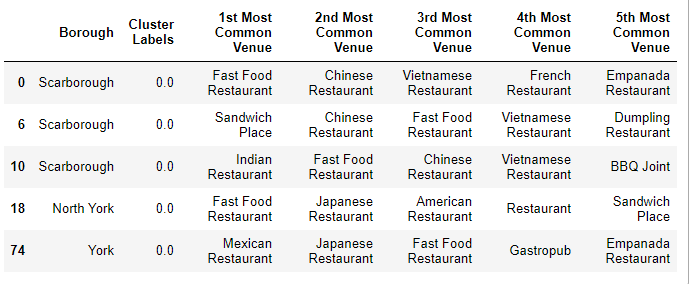
*Cluster 1*: 
3 options
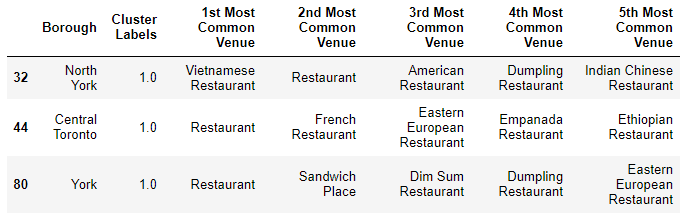
*Cluster 2*: 
0 options
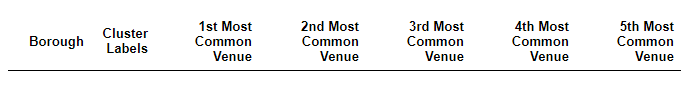
*Cluster 3*: 
37 options
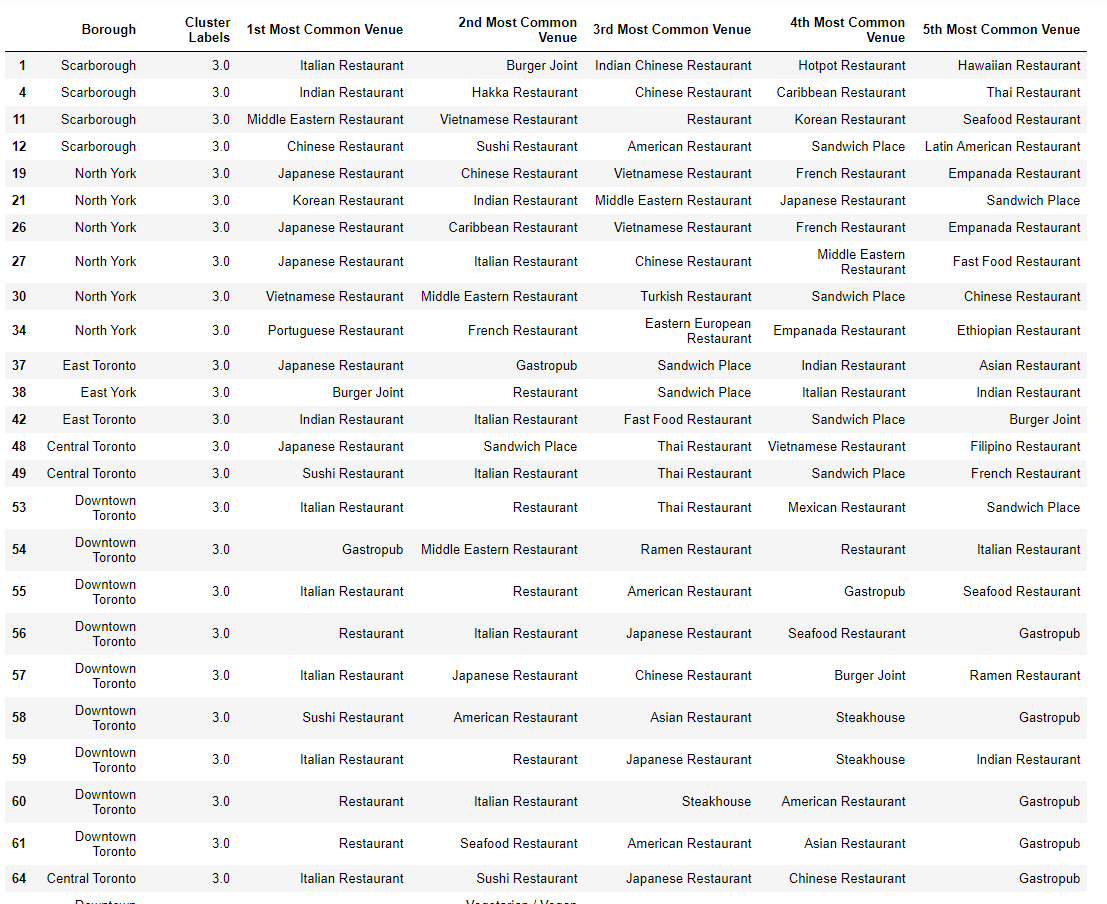
*Cluster 4*: 
1 option
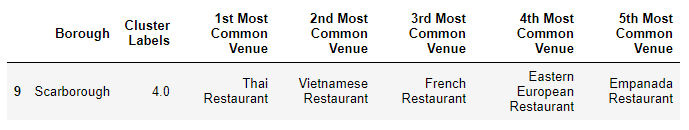

# Discussion

After having the results we are in the position to evaluate the feasibility of our system. Here are some ideas to be discussed:
1. Among a total of 103 neighborhood that exist in Toronto 46 six of them have not a Pizza Place in their 5 top restaurant venues.
2. The clustering technique allow us to refine the neighbourhood candidates to install our Pizza Place since in every clusters except cluster 3 we have no more than 5 options of choice.
3. The Cluster 3 has 37 optional neighborhood which seems unbearable to make a decision. Therefore, a finer processing in this cluster has to be made in order decrease the amount of options. The criteria of such finer processing could be the vicinity of other entertainment venues such as casinos, sport arenas,etc.
4. As we have get a total of 46 neighborhoods candidates which is quite a lot to make a decision, we can say that our system is not quite feasible for finding a neighborhood to install a Pizza Place. Thus, we can check if the system is better for another kind of restaurant.

# Conclusion

As a conclustion to be drawn about this exercise, I can say that thanks to it I have able to use Machine Learning techniques as well as a programming code as Python and it library to apply for a real life problem. So, I've come up with solution that can be applied to a potential real users.